In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

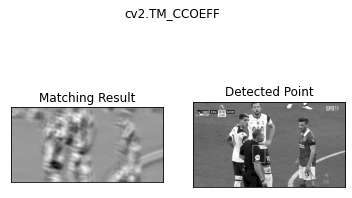

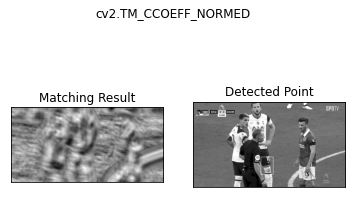

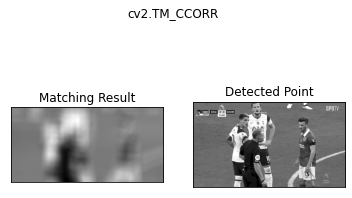

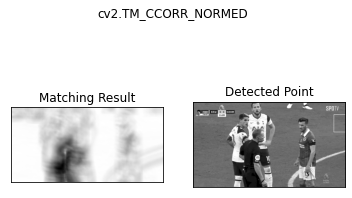

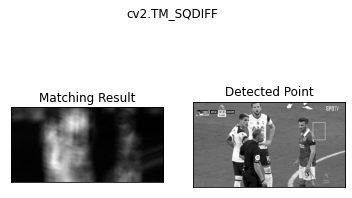

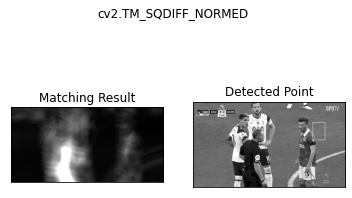

In [6]:
img = cv2.imread('33.png',0)
img2 = img.copy()
template = cv2.imread('44.png',0)

w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [2]:
img_rgb = cv2.imread('mario2.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('tar.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
print(res)

threshold = 0.5
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
print(res)
cv2.imshow('res', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.06756699 -0.07033169 -0.07172194 ... -0.06468558 -0.05170453
  -0.03732723]
 [-0.06916373 -0.07204733 -0.07358289 ... -0.06932314 -0.05610747
  -0.04141501]
 [-0.06309576 -0.06615089 -0.06801061 ... -0.06375343 -0.05020374
  -0.03495247]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.06756699 -0.07033169 -0.07172194 ... -0.06468558 -0.05170453
  -0.03732723]
 [-0.06916373 -0.07204733 -0.07358289 ... -0.06932314 -0.05610747
  -0.04141501]
 [-0.06309576 -0.06615089 -0.06801061 ... -0.06375343 -0.05020374
  -0.03495247]]


In [4]:
def nothing():
    pass

In [8]:
img_rgb = cv2.imread('mario2.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('tar.png',0)
w, h = template.shape[::-1]


res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
print(res)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

res=(res-min_val)/(max_val-min_val)
print(res)

threshold = 0.8
loc = np.where(res >= threshold)

print(loc[::-1])

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 200, 255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    loc = np.where(res >= threshold/255.)
    img_rgb = cv2.imread('mario.png')
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.06756699 -0.07033169 -0.07172194 ... -0.06468558 -0.05170453
  -0.03732723]
 [-0.06916373 -0.07204733 -0.07358289 ... -0.06932314 -0.05610747
  -0.04141501]
 [-0.06309576 -0.06615089 -0.06801061 ... -0.06375343 -0.05020374
  -0.03495247]]
-0.5536813735961914 0.5633634924888611 (1341, 952) (467, 499)
[[0.49566618 0.49566618 0.49566618 ... 0.49566618 0.49566618 0.49566618]
 [0.49566618 0.49566618 0.49566618 ... 0.49566618 0.49566618 0.49566618]
 [0.49566618 0.49566618 0.49566618 ... 0.49566618 0.49566618 0.49566618]
 ...
 [0.4351789  0.43270388 0.4314593  ... 0.4377584  0.4493793  0.4622501 ]
 [0.43374947 0.43116802 0.42979336 ... 0.43360677 0.4454377  0.45859063]
 [0.43918166 0.4364466  0.43478176 ... 0.43859288 0.4507228  0.46437606]]
(array([ 464,  465,  466, 

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given

TypeError: nothing() takes 0 positional arguments but 1 was given